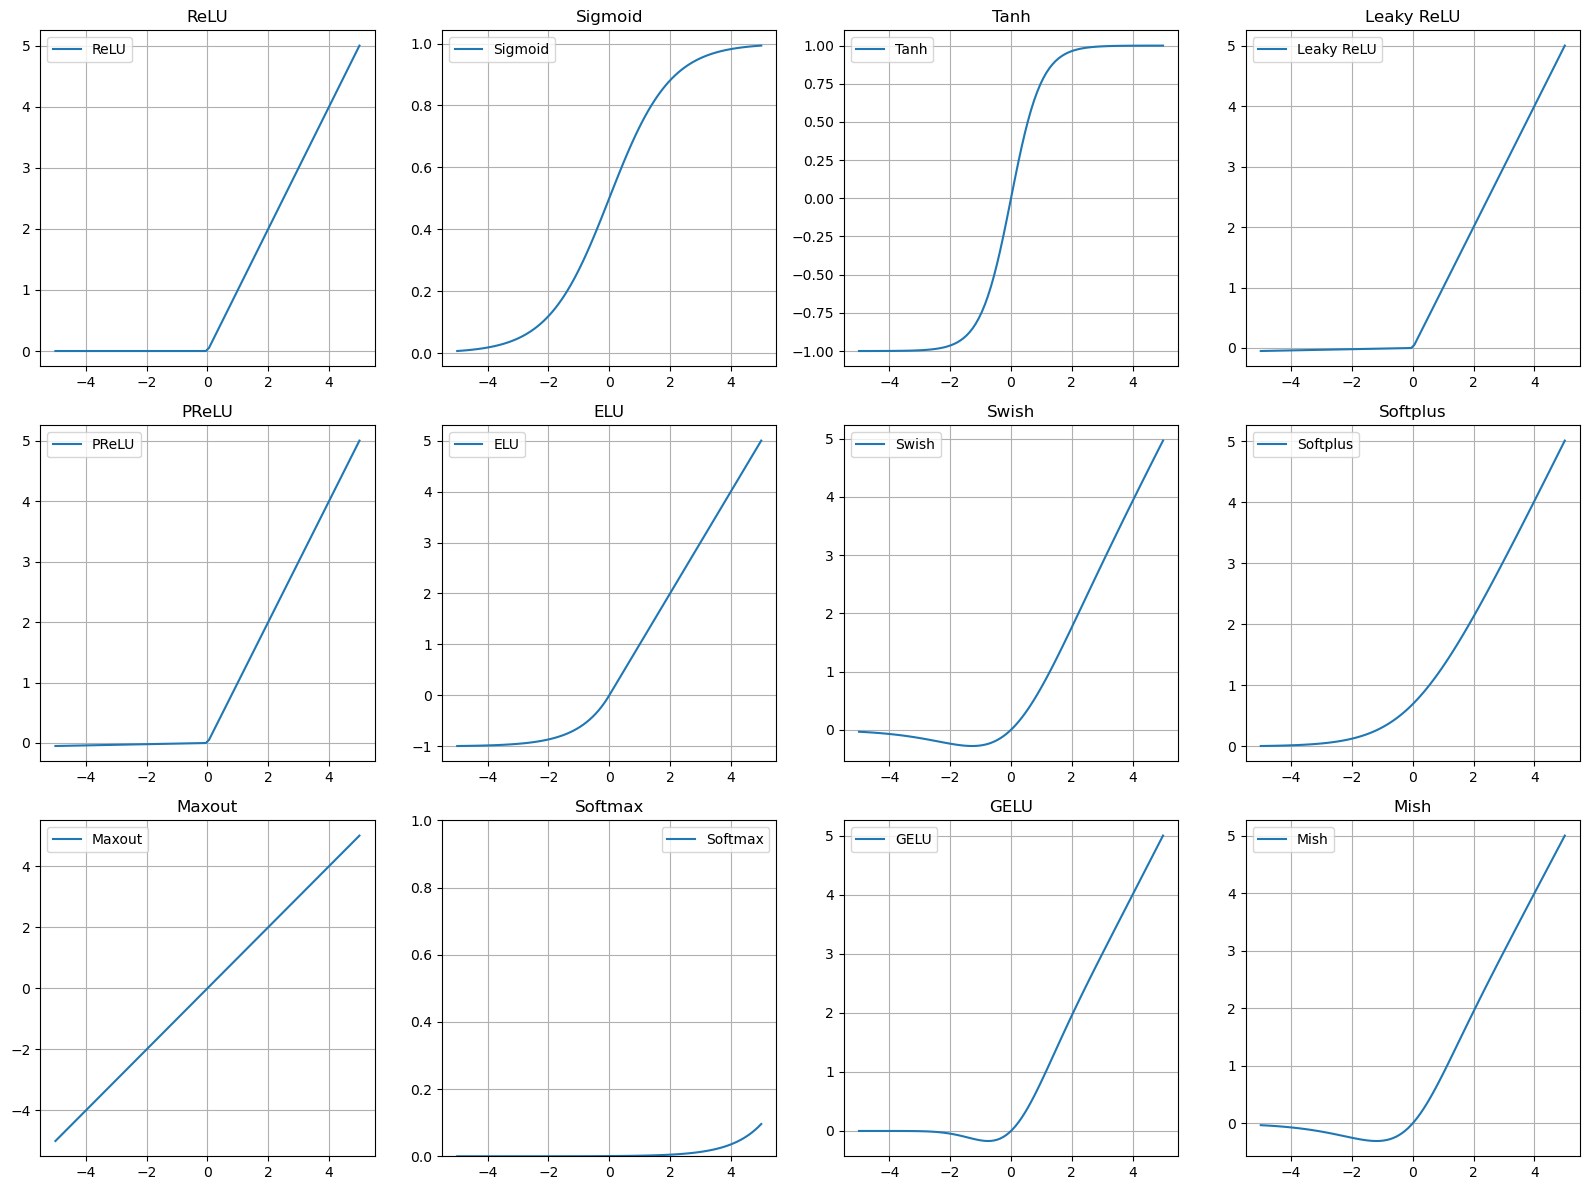

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def softplus(x):
    return np.log(1 + np.exp(x))

def maxout(x, k=3):
    return np.maximum.reduce([x for _ in range(k)])

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0, keepdims=True)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

# Generate input values
x = np.linspace(-5, 5, 100)

# Create a 4x3 grid of subplots
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Activation functions and corresponding titles
functions = [relu, sigmoid, tanh, leaky_relu, prelu, elu, swish, softplus, maxout, softmax, gelu, mish]
titles = ['ReLU', 'Sigmoid', 'Tanh', 'Leaky ReLU', 'PReLU', 'ELU', 'Swish', 'Softplus', 'Maxout', 'Softmax', 'GELU', 'Mish']

# Plot each function
for i, ax in enumerate(axs.flatten()):
    if i < len(functions):
        # Special handling for softmax, which works on vectors
        if titles[i] == 'Softmax':
            ax.plot(x, softmax(np.expand_dims(x, axis=1)), label='Softmax')
            ax.set_ylim(0, 1)
        else:
            ax.plot(x, functions[i](x), label=titles[i])
        ax.set_title(titles[i])
        ax.grid(True)
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('AF.pdf')
plt.show()


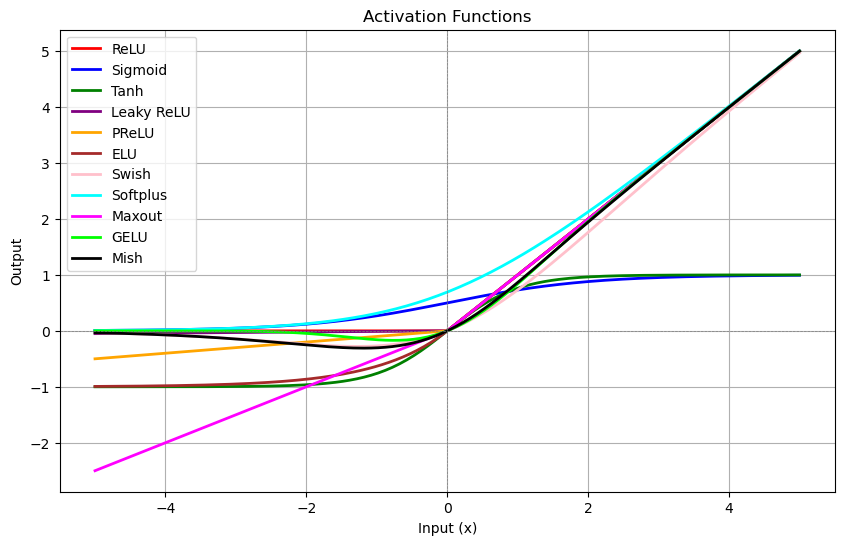

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def prelu(x, alpha=0.1):  # PReLU with a learnable alpha
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

def softplus(x):
    return np.log(1 + np.exp(x))

def maxout(x):
    return np.maximum(x, x * 0.5)  # Simplified version

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

# Generate input values
x = np.linspace(-5, 5, 200)

# List of functions and their names
functions = [relu, sigmoid, tanh, leaky_relu, prelu, elu, swish, softplus, maxout, gelu, mish]
titles = ['ReLU', 'Sigmoid', 'Tanh', 'Leaky ReLU', 'PReLU', 'ELU', 'Swish', 'Softplus', 'Maxout', 'GELU', 'Mish']

# Define more distinct colors manually
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'lime', 'black']

# Create a single figure
plt.figure(figsize=(10, 6))

# Plot each activation function
for func, title, color in zip(functions, titles, colors):
    plt.plot(x, func(x), label=title, color=color, linewidth=2)

# Formatting
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.title("Activation Functions")
plt.legend()
plt.grid(True)

# Save and show the figure
plt.savefig("activation_functions.pdf")
plt.show()


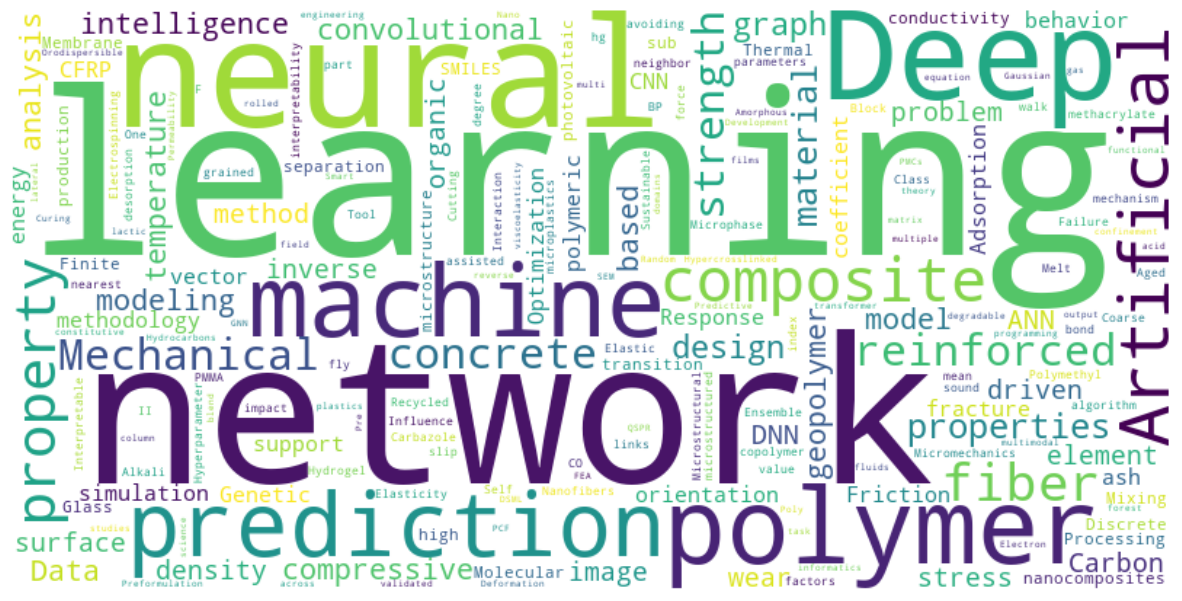

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка файла CSV
file_path = "scopus.csv"  # Замените на путь к вашему файлу
data = pd.read_csv(file_path)

# Проверяем наличие колонки "Ключевые слова автора"
if 'Ключевые слова автора' in data.columns:
    keywords = data['Ключевые слова автора'].dropna()  # Убираем пустые строки
    all_keywords = ' '.join(keywords)
else:
    raise ValueError("Колонка 'Ключевые слова автора' не найдена в файле CSV.")

# Генерация облака слов
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis', 
    collocations=False
).generate(all_keywords)

# Отображение облака слов
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_new.png', dpi=400)
#plt.title("Облако ключевых слов", fontsize=16)
plt.show()


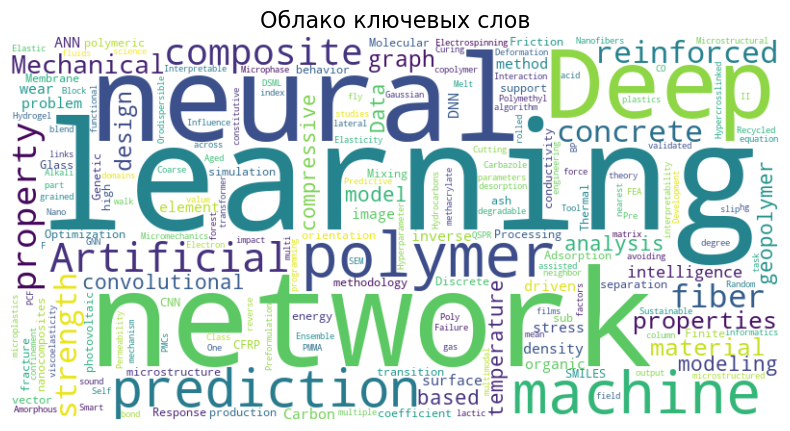

Облако слов сохранено в файл wordcloud.pdf


In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка файла CSV
file_path = "scopus.csv"  # Замените на путь к вашему файлу
data = pd.read_csv(file_path)

# Проверяем наличие колонки "Ключевые слова автора"
if 'Ключевые слова автора' in data.columns:
    keywords = data['Ключевые слова автора'].dropna()  # Убираем пустые строки
    all_keywords = ' '.join(keywords)
else:
    raise ValueError("Колонка 'Ключевые слова автора' не найдена в файле CSV.")

# Генерация облака слов
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis', 
    collocations=False
).generate(all_keywords)

# Отображение и сохранение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако ключевых слов", fontsize=16)

# Сохранение в PDF
output_file = "wordcloud.pdf"  # Имя выходного файла
plt.savefig(output_file, format='pdf', bbox_inches='tight', dpi=300)
plt.show()

print(f"Облако слов сохранено в файл {output_file}")


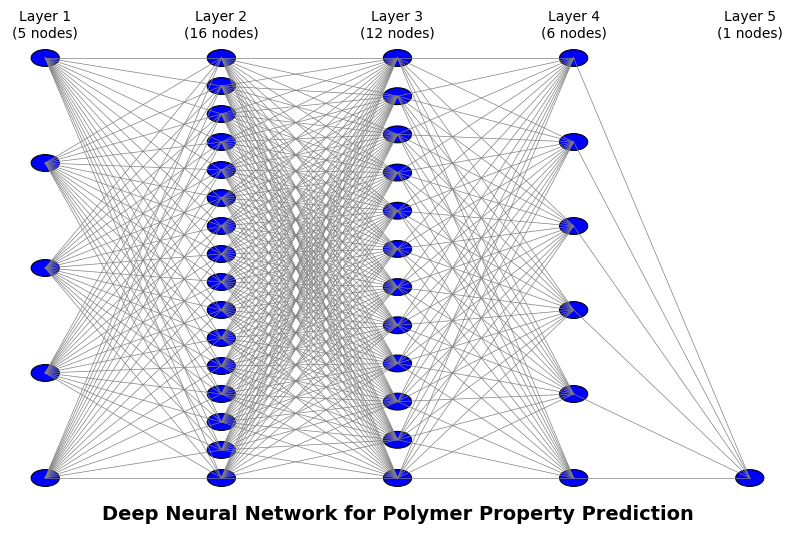

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_network(layer_sizes):
    """
    Draws a diagram of a feedforward neural network.
    
    Parameters:
        layer_sizes (list): List of integers where each integer represents 
                            the number of nodes in a layer.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    
    # Layer x positions
    layer_x_positions = np.linspace(0, 1, len(layer_sizes))
    max_nodes = max(layer_sizes)
    
    # Draw the nodes and connections
    for layer_idx, layer_size in enumerate(layer_sizes):
        y_positions = np.linspace(0, 1, layer_size)
        x_position = layer_x_positions[layer_idx]
        
        # Draw nodes
        for y in y_positions:
            circle = plt.Circle((x_position, y), 0.02, color='blue', ec='black', lw=0.8)
            ax.add_artist(circle)
        
        # Draw connections to next layer
        if layer_idx < len(layer_sizes) - 1:
            next_y_positions = np.linspace(0, 1, layer_sizes[layer_idx + 1])
            next_x_position = layer_x_positions[layer_idx + 1]
            for y1 in y_positions:
                for y2 in next_y_positions:
                    ax.plot([x_position, next_x_position], [y1, y2], color='gray', lw=0.5)
    
    # Add layer annotations
    for i, (x, size) in enumerate(zip(layer_x_positions, layer_sizes)):
        ax.text(x, 1.05, f"Layer {i+1}\n({size} nodes)", ha='center', fontsize=10)

    # Title
    ax.text(0.5, -0.1, "Deep Neural Network for Polymer Property Prediction",
            ha='center', fontsize=14, fontweight='bold', color='black')
    plt.savefig('DNN.pdf')
    plt.show()

# Define the DNN structure
layer_sizes = [5, 16, 12, 6, 1]  # Example: 10 inputs, 3 hidden layers, 1 output
draw_neural_network(layer_sizes)


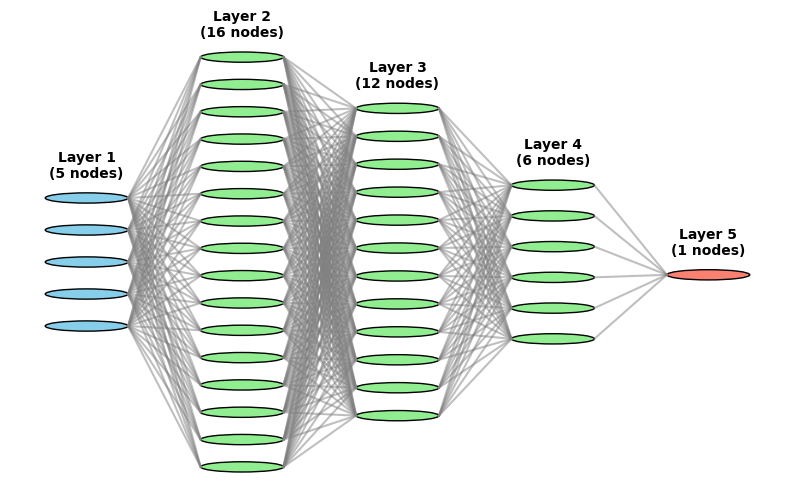

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_neural_network(layer_sizes):
    """
    Draws a diagram of a feedforward neural network with distinct colors and clear spacing.
    
    Parameters:
        layer_sizes (list): List where each element represents the number of nodes in that layer.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Define colors for different layers
    colors = ['skyblue', 'lightgreen', 'lightgreen', 'lightgreen', 'salmon']

    # X positions of layers
    x_positions = np.linspace(0, 3, len(layer_sizes))

    # Store node positions for connections
    node_positions = []

    # Plot nodes
    for layer_idx, (x, num_nodes) in enumerate(zip(x_positions, layer_sizes)):
        y_positions = np.linspace(-num_nodes / 2, num_nodes / 2, num_nodes)
        node_positions.append((x, y_positions))

        for y in y_positions:
            ax.add_patch(patches.Circle((x, y), radius=0.2, color=colors[layer_idx], ec='black'))
        
        # Label layers
        ax.text(x, max(y_positions) + 0.8, f"Layer {layer_idx+1}\n({num_nodes} nodes)", 
                ha='center', fontsize=10, fontweight='bold')

    # Plot connections
    for i in range(len(layer_sizes) - 1):
        x1, y1_positions = node_positions[i]
        x2, y2_positions = node_positions[i + 1]

        for y1 in y1_positions:
            for y2 in y2_positions:
                ax.plot([x1 + 0.2, x2 - 0.2], [y1, y2], color='gray', alpha=0.5)

    # Title
    #ax.text(1.5, -max(layer_sizes) / 1.5, "Deep Neural Network for Polymer Property Prediction", 
    #        ha='center', fontsize=14, fontweight='bold', color='black')

    plt.savefig("DNN.pdf")
    plt.show()

# Define DNN structure
layer_sizes = [5, 16, 12, 6, 1]  # Example: 5 input, 3 hidden layers, 1 output
draw_neural_network(layer_sizes)


In [8]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('Scopus.csv')

# Rename the columns
data.columns = ['Authors', 'Full', 'IDs', 'Document Title', 'Year', 'Link', 'Author Keywords']
#Автор (ы),"Author full names","Идентификатор автора(ов)","Название документа","Год","Ссылка","Ключевые слова автора"

# Display the first few rows to confirm changes
data.to_csv('cc.csv')


C:\Users\ivan\AppData\Local\Temp\ipykernel_6056\1903988253.py:31: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


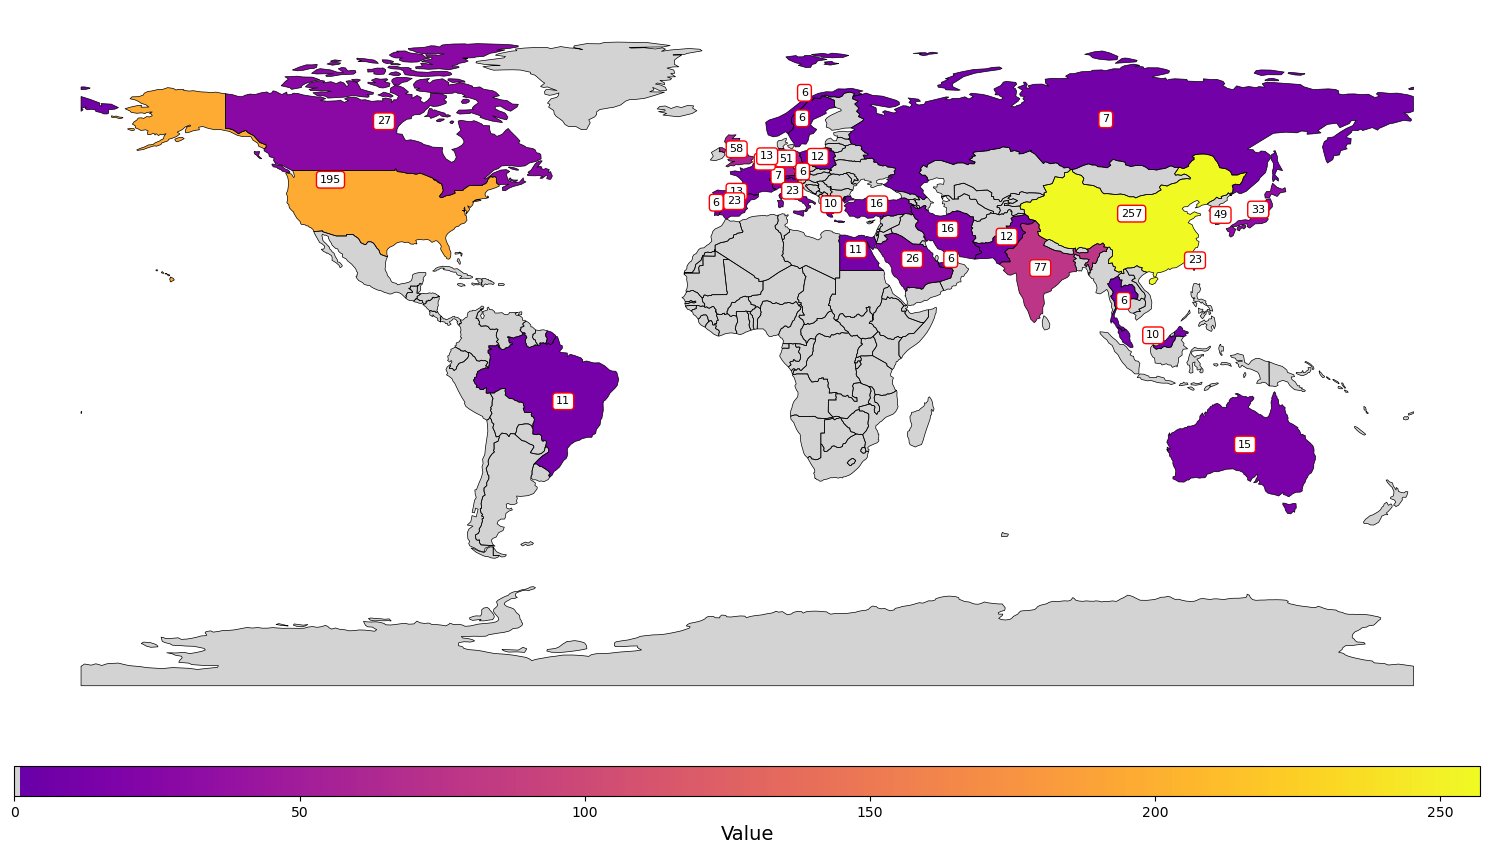

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_world_map_with_annotations(file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path, header=3)  # Assuming header is on the 4th row (0-indexed 3)
    
    # Rename the columns for clarity (Assuming the columns are named 'Country' and 'Value')
    data.columns = ['Country', 'Value']
    
    # Exclude records with 'Undefined' and filter by Value > 5
    data = data[data['Country'] != 'Undefined']
    data = data[data['Value'] > 5]

    # Define a dictionary to map country names in the data to those used in the GeoPandas world dataset
    country_mapping = {
        "United States": "United States of America",
        #"South Korea": "Korea",
        "Russian Federation": "Russia",
        #"Iran": "Iran, Islamic Republic of",
        #"Viet Nam": "Vietnam"
    }
    
    # Apply the mapping to the dataset
    data["Country"] = data["Country"].replace(country_mapping)

    
    # Load a base world map using GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    # Merge the world map with the data based on the country name
    world = world.merge(data, how='left', left_on='name', right_on='Country')
    
    # Fill NaN values in the 'Value' column with 0 (countries not in the data will be gray)
    world['Value'] = world['Value'].fillna(0)
    
    # Define a colormap where 0 is explicitly gray
    cmap = ListedColormap(["lightgray"] + plt.cm.plasma(np.linspace(0.2, 1.0, 256)).tolist())
    
    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax, linewidth=0.5, color='black')  # Plot boundaries of all countries
    world.plot(column='Value', ax=ax, legend=False, cmap=cmap, 
               missing_kwds={"color": "lightgray"})
    
    # Add annotations for each country
    for _, row in world.iterrows():
        if row['Value'] > 0:  # Only annotate countries with a value > 0
            # Get the centroid of the country geometry for text placement
            if row['geometry'].geom_type == 'MultiPolygon':
                point = row['geometry'].centroid
            else:
                point = row['geometry'].representative_point()
            
            # Add the value as text with a red box and white background
            ax.text(
                x=point.x, y=point.y, s=str(int(row['Value'])), ha='center', fontsize=8,
                bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3')
            )
    
    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, 
                               norm=plt.Normalize(vmin=world['Value'].min(), 
                                                  vmax=world['Value'].max()))
    sm._A = []  # Required for ScalarMappable to work
    cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05, aspect=50)
    cbar.set_label('Value', fontsize=14)
    
    # Set title and remove axes
    #ax.set_title('World Map with Country Values', fontsize=16)
    ax.axis('off')  # Remove axis for cleaner visualization
    
    # Save the map to a file
    plt.tight_layout()
    plt.savefig('world_map_with_annotations.pdf', format='pdf')
    plt.show()

# Example usage:
file_path = 'Scopus-10-Analyze-Country.csv'
plot_world_map_with_annotations(file_path)


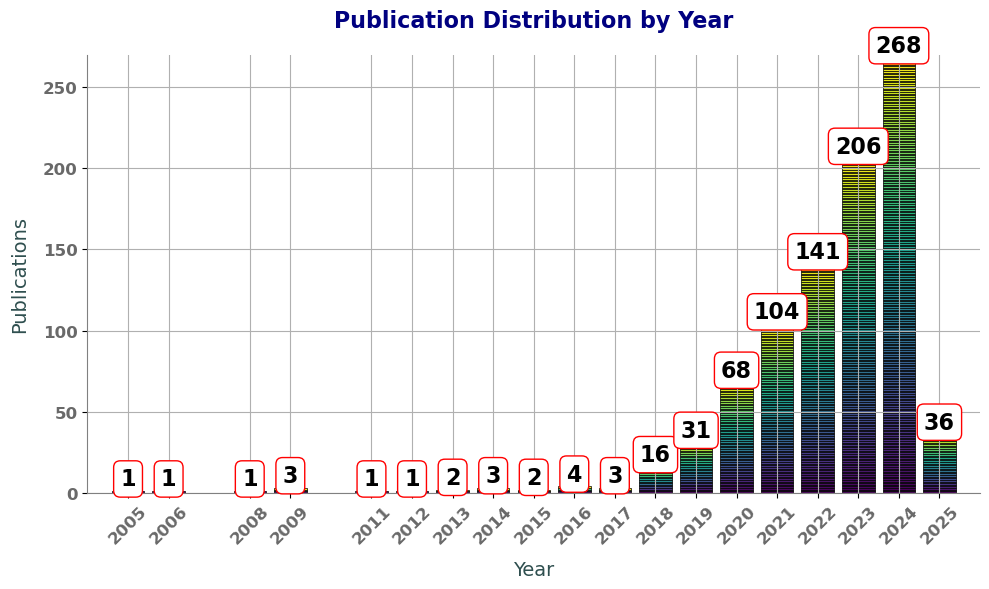

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_data_distribution(file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path, header=3)  # Specify that the header is on the 4th row (0-indexed 3)

    # Rename the columns for clarity
    data.columns = ['Year', 'Count']

    # Sorting the data by year in ascending order
    sorted_data = data.sort_values(by='Year')
    sorted_data = sorted_data[sorted_data['Year']>2004]
    # Extracting sorted years and corresponding counts
    sorted_years = sorted_data['Year'].tolist()
    sorted_counts = sorted_data['Count'].tolist()

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))
    plt.grid()
    # Create bars with gradient colors
    for i, (year, value) in enumerate(zip(sorted_years, sorted_counts)):
        # Create a gradient effect for each bar
        gradient = np.linspace(0, 1, value)  # Create a gradient from 0 to 1 based on the value
        colors = plt.cm.viridis(gradient)  # Use viridis colormap for the gradient colors
        
        for j in range(value):
            plt.bar(year, 1, bottom=j, color=colors[j], edgecolor='black', linewidth=0.5)

    # Adding value labels in bounding boxes
    for year, value in zip(sorted_years, sorted_counts):
        plt.text(
            year,
            value + 0.5,  # Positioning text slightly above the top of the bar
            f"{value}",
            ha='center',
            va='bottom',
            fontsize=16,
            fontweight='bold',
            bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3")  # White background with red border
        )

    # Adding title and labels
    plt.title("Publication Distribution by Year", fontsize=16, weight='bold', pad=20, color="navy")
    plt.xlabel("Year", fontsize=14, labelpad=10, color="darkslategray")
    plt.ylabel("Publications", fontsize=14, labelpad=10, color="darkslategray")

    # Customizing the axes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.xticks(color="dimgray", fontsize=12, weight='bold')
    plt.yticks(color="dimgray", fontsize=12, weight='bold')

    # Установка меток по оси X с пропуском по годам
    plt.xticks(ticks=sorted_years, labels=sorted_years, rotation=45)
    plt.xlim(sorted_years[0] - 1, sorted_years[-1] + 1)  # Установка пределов оси X

    # Установка пределов для лучшей визуализации
    plt.ylim(0, max(sorted_counts) + 2)

    # Save plot to PDF
    plt.tight_layout()
    plt.savefig('data_distribution_by_year.pdf', format='pdf')
    plt.show()  # Close the plot to free up memory

# Example usage:
file_path = 'Scopus-10-Analyze-Year.csv'
plot_data_distribution(file_path)


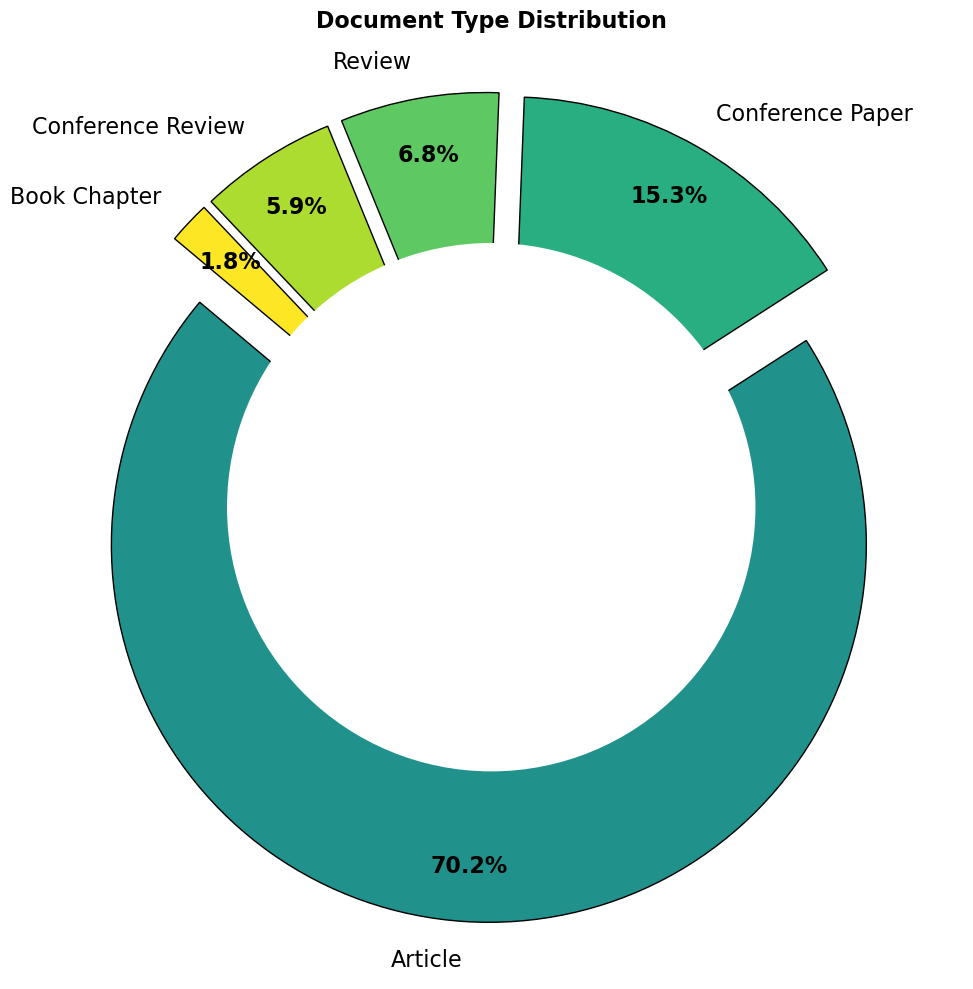

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_doctype_distribution(file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path, header=3)  # Assuming header is on the 4th row (0-indexed 3)

    # Rename the columns for clarity (Assuming the columns are named 'Doctype' and 'Value')
    data.columns = ['Doctype', 'Value']
    data = data[data['Value']>5]
    
    # Exclude records with 'Undefined'
    data = data[data['Doctype'] != 'Undefined']

    # Extracting document types and their corresponding values
    doctypes = data['Doctype'].tolist()
    values = data['Value'].tolist()

    # Define the explode parameter for visual effect (optional)
    explode = [0.1] * len(doctypes)  # Explode all slices for better visibility

    # Using 'viridis' colormap, but only from 0.4 to 1.0 (to avoid dark colors)
    viridis_colors = plt.cm.viridis(np.linspace(0.5, 1.0, len(values)))

    # Create figure
    plt.figure(figsize=(12, 10))

    # Create pie chart with gradient colors and black edges around each segment
    wedges, texts, autotexts = plt.pie(
        values, labels=doctypes, autopct='%1.1f%%', startangle=140,
        explode=explode, colors=viridis_colors, pctdistance=0.85, labeldistance=1.1,
        wedgeprops={"edgecolor": "black"}  # Add black edges for each segment
    )

    # Customize text
    for text in texts:
        text.set_fontsize(16)
        text.set_color("black")  # Set document type label color to black for readability
    for autotext in autotexts:
        autotext.set_color("black")  # Set percentage label color to black
        autotext.set_fontsize(16)
        autotext.set_weight("bold")

    # Add a central circle for donut effect
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(centre_circle)

    # Set the title
    plt.title("Document Type Distribution", fontsize=16, weight='bold')
    plt.tight_layout()

    # Save the plot to PDF
    plt.savefig('doctype_distribution.pdf', format='pdf')
    plt.show()  # Close the plot to free up memory

# Example usage:
file_path = 'Scopus-10-Analyze-Doctype.csv'
plot_doctype_distribution(file_path)
